# Data Science Job Postings on Glassdoor (Cleaned Dataset)

### Importing Dataset and Data Exploration

In [1]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv("Cleaned_DS_Jobs.csv", header=TRUE)

In [3]:
df <- df %>% select(-c("Salary.Estimate", "Job.Description", "Company.Name", "Industry", "Location", "Headquarters", "same_state"))

df


Job.Title,Rating,Size,Type.of.ownership,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
Sr Data Scientist,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance,Unknown / Non-Applicable,137,171,154,NY,27,0,0,0,0,1,0,0,data scientist,senior
Data Scientist,4.2,5001 to 10000 employees,Company - Public,Business Services,$1 to $2 billion (USD),137,171,154,VA,52,0,0,1,0,0,0,1,data scientist,na
Data Scientist,3.8,1001 to 5000 employees,Private Practice / Firm,Business Services,$100 to $500 million (USD),137,171,154,MA,39,1,1,0,0,1,0,0,data scientist,na
Data Scientist,3.5,501 to 1000 employees,Company - Public,Manufacturing,$100 to $500 million (USD),137,171,154,MA,20,1,1,0,0,1,0,0,data scientist,na
Data Scientist,2.9,51 to 200 employees,Company - Private,Business Services,Unknown / Non-Applicable,137,171,154,NY,22,1,1,0,0,0,0,0,data scientist,na
Data Scientist,4.2,51 to 200 employees,Company - Private,Information Technology,Unknown / Non-Applicable,137,171,154,CA,10,1,1,1,1,0,0,0,data scientist,na
Data Scientist / Machine Learning Expert,3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),137,171,154,MA,24,1,0,0,0,0,0,0,data scientist,na
Data Scientist,3.5,1001 to 5000 employees,Company - Public,Retail,$1 to $2 billion (USD),137,171,154,MA,30,1,0,0,0,0,0,0,data scientist,na
Staff Data Scientist - Analytics,4.4,5001 to 10000 employees,Company - Public,Information Technology,$2 to $5 billion (USD),137,171,154,CA,37,0,0,0,0,0,0,0,data scientist,na


In [4]:
df <- df[df$Rating != 0.0, ]

head(df, 1)

,Job.Title,Rating,Size,Type.of.ownership,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,Sr Data Scientist,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance,Unknown / Non-Applicable,137,171,154,NY,27,0,0,0,0,1,0,0,data scientist,senior


In [5]:
dim(df)

[1] 610  20

In [6]:
summary(df)

  Job.Title             Rating          Size           Type.of.ownership 
 Length:610         Min.   :2.000   Length:610         Length:610        
 Class :character   1st Qu.:3.500   Class :character   Class :character  
 Mode  :character   Median :3.800   Mode  :character   Mode  :character  
                    Mean   :3.881                                        
                    3rd Qu.:4.400                                        
                    Max.   :5.000                                        
    Sector            Revenue            min_salary       max_salary   
 Length:610         Length:610         Min.   : 31.00   Min.   : 56.0  
 Class :character   Class :character   1st Qu.: 79.00   1st Qu.:119.0  
 Mode  :character   Mode  :character   Median : 91.00   Median :132.0  
                                       Mean   : 98.59   Mean   :147.2  
                                       3rd Qu.:122.00   3rd Qu.:165.0  
                                       Max.   :212

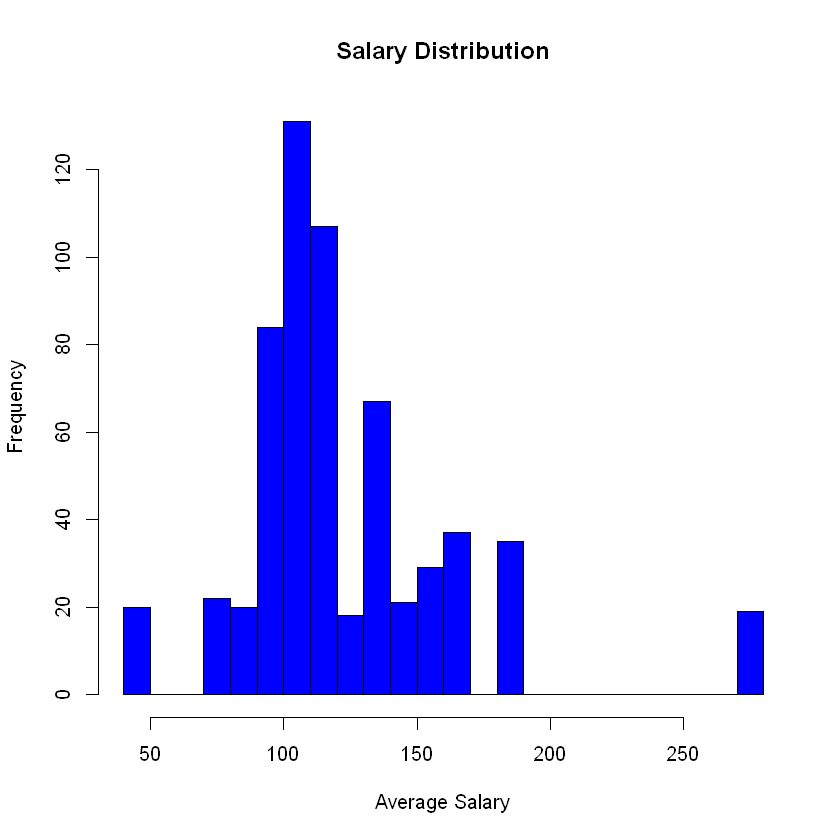

In [7]:
hist(df$avg_salary, breaks=20, main="Salary Distribution", xlab="Average Salary", col="blue")

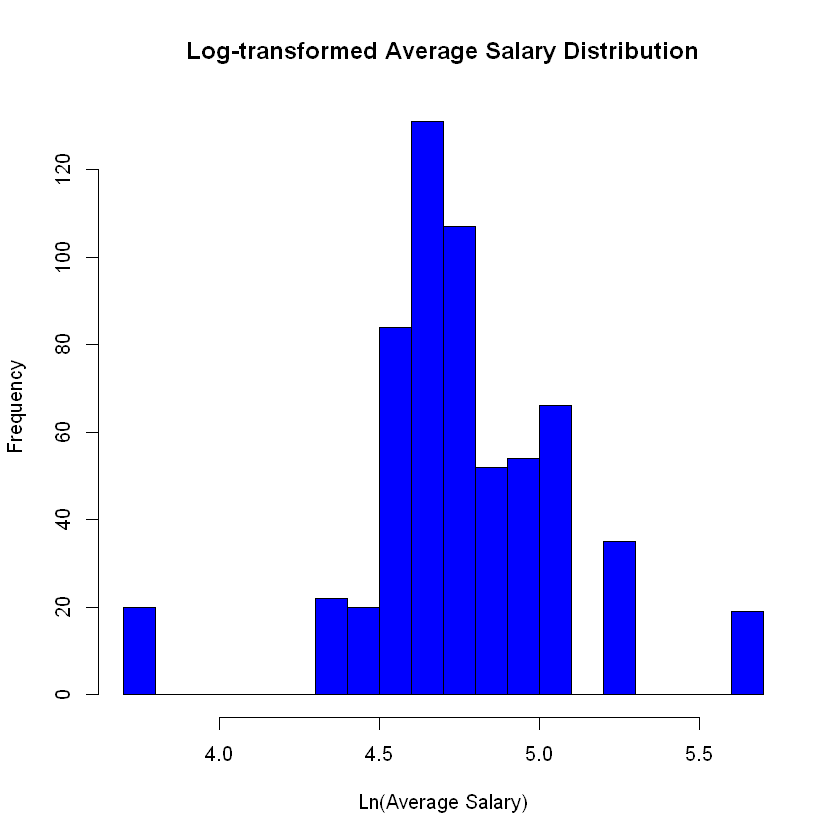

In [8]:
df$ln_avg_salary <- log(df$avg_salary)
hist(df$ln_avg_salary, breaks=20, main="Log-transformed Average Salary Distribution", xlab="Ln(Average Salary)", col="blue")

In [9]:
str(df)


'data.frame':	610 obs. of  21 variables:
 $ Job.Title        : chr  "Sr Data Scientist" "Data Scientist" "Data Scientist" "Data Scientist" ...
 $ Rating           : num  3.1 4.2 3.8 3.5 2.9 4.2 3.9 3.5 4.4 3.6 ...
 $ Size             : chr  "1001 to 5000 employees" "5001 to 10000 employees" "1001 to 5000 employees" "501 to 1000 employees" ...
 $ Type.of.ownership: chr  "Nonprofit Organization" "Company - Public" "Private Practice / Firm" "Company - Public" ...
 $ Sector           : chr  "Insurance" "Business Services" "Business Services" "Manufacturing" ...
 $ Revenue          : chr  "Unknown / Non-Applicable" "$1 to $2 billion (USD)" "$100 to $500 million (USD)" "$100 to $500 million (USD)" ...
 $ min_salary       : int  137 137 137 137 137 137 137 137 137 137 ...
 $ max_salary       : int  171 171 171 171 171 171 171 171 171 171 ...
 $ avg_salary       : int  154 154 154 154 154 154 154 154 154 154 ...
 $ job_state        : chr  " NY" " VA" " MA" " MA" ...
 $ company_age      : int  

# Transforming Size to avg_employees

In [10]:
# Extract minimum and maximum employee numbers
df$min_employees <- as.numeric(gsub(" .*", "", df$Size))
df$max_employees <- as.numeric(gsub(".*to ", "", gsub(" employees", "", df$Size)))

# Replace NA values which might occur due to parsing inconsistencies or special cases like "Unknown"
df$min_employees[is.na(df$min_employees)] <- 0
df$max_employees[is.na(df$max_employees)] <- 0

df$avg_employees <- (df$min_employees + df$max_employees) / 2

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [11]:
df$avg_employees[df$avg_employees == 0] <- 10000

head(df, 1)

,Job.Title,Rating,Size,Type.of.ownership,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,⋯,spark,aws,tableau,big_data,job_simp,seniority,ln_avg_salary,min_employees,max_employees,avg_employees
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Sr Data Scientist,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance,Unknown / Non-Applicable,137,171,154,NY,⋯,0,1,0,0,data scientist,senior,5.036953,1001,5000,3000.5


# One Hot Encoding

In [12]:
unique(df$Type.of.ownership)
unique(df$Revenue)

[1] "Nonprofit Organization"         "Company - Public"              
 [3] "Private Practice / Firm"        "Company - Private"             
 [5] "Government"                     "Subsidiary or Business Segment"
 [7] "Other Organization"             "Unknown"                       
 [9] "Hospital"                       "Self-employed"                 
[11] "College / University"           "Contract"

[1] "Unknown / Non-Applicable"         "$1 to $2 billion (USD)"          
 [3] "$100 to $500 million (USD)"       "$10+ billion (USD)"              
 [5] "$2 to $5 billion (USD)"           "$500 million to $1 billion (USD)"
 [7] "$5 to $10 billion (USD)"          "$10 to $25 million (USD)"        
 [9] "$25 to $50 million (USD)"         "$50 to $100 million (USD)"       
[11] "$1 to $5 million (USD)"           "$5 to $10 million (USD)"         
[13] "Less than $1 million (USD)"

In [13]:
columns_to_encode <- c("Type.of.ownership", "Sector", "Revenue", "job_state", "job_simp", "seniority")


for (col in columns_to_encode) {
  new_col_name <- paste0(col, "_encoded") # Creating a new column name for the encoded version
  df[[new_col_name]] <- as.integer(factor(df[[col]])) # Assigning encoded values to the new column
}

# # One-hot encode the 'Type.of.ownership' column as an example
# df <- cbind(df, model.matrix(~ Type.of.ownership - 1, data = df))
# df <- cbind(df, model.matrix(~ Sector - 1, data = df))
# df <- cbind(df, model.matrix(~ Revenue - 1, data = df))
# df <- cbind(df, model.matrix(~ job_state - 1, data = df))
# df <- cbind(df, model.matrix(~ job_simp - 1, data = df))
# df <- cbind(df, model.matrix(~ seniority - 1, data = df))

# Choosing Numeric Values

In [14]:
numeric_df <- df[sapply(df, is.numeric)]

# Specify the skill columns
skill_columns <- c("python", "excel", "hadoop", "spark", "aws", "tableau", "big_data")

# Calculate the sum of skills for each row
numeric_df$skills_sum <- rowSums(numeric_df[, skill_columns])

# Calculate the decimal of skills for each row (number of skills possessed / total number of skills)
total_skills <- length(skill_columns)
numeric_df$skills_decimal <- numeric_df$skills_sum / total_skills

numeric_df <- numeric_df %>% 
  select(-python, -excel, -hadoop, -spark, -aws, -tableau, -big_data, -min_salary, -max_salary, -skills_sum,-min_employees, -max_employees)

# View the modified dataframe
head(numeric_df)

,Rating,avg_salary,company_age,ln_avg_salary,avg_employees,Type.of.ownership_encoded,Sector_encoded,Revenue_encoded,job_state_encoded,job_simp_encoded,seniority_encoded,skills_decimal
,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,3.1,154,27,5.036953,3000.5,7,14,13,25,3,3,0.1428571
2,4.2,154,52,5.036953,7500.5,3,6,1,35,3,2,0.2857143
3,3.8,154,39,5.036953,3000.5,9,6,5,15,3,2,0.4285714
4,3.5,154,20,5.036953,750.5,3,15,5,15,3,2,0.4285714
5,2.9,154,22,5.036953,125.5,2,6,13,25,3,2,0.2857143
6,4.2,154,10,5.036953,125.5,2,13,13,3,3,2,0.5714286


Warning message:
"package 'reshape2' was built under R version 4.3.3"


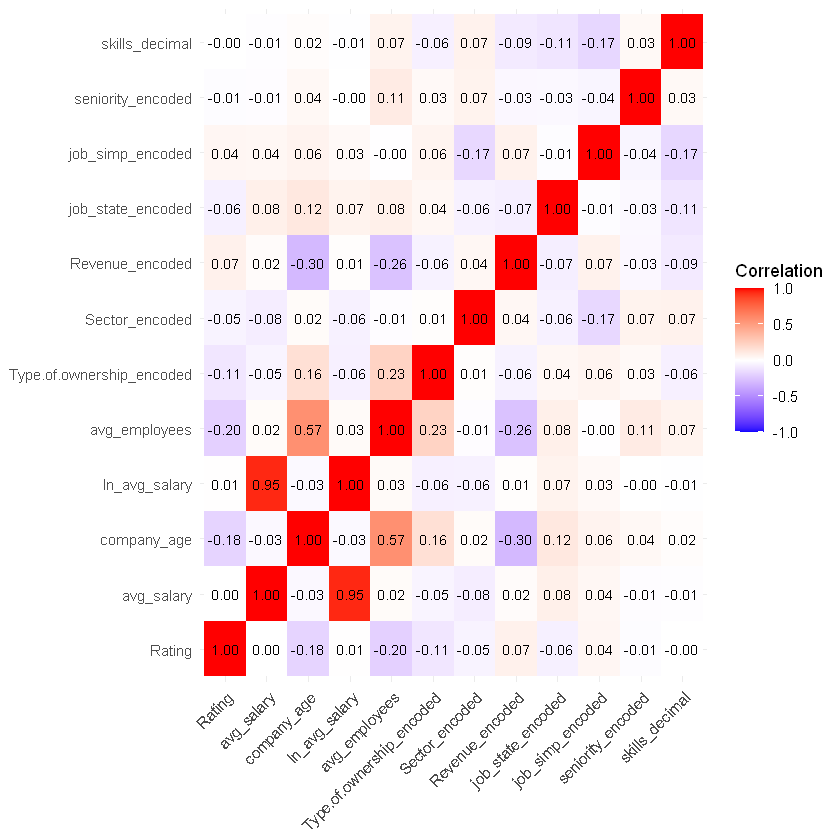

In [18]:
library(ggplot2)
library(reshape2)

cor_matrix <- cor(numeric_df, use = "pairwise.complete.obs")
cor_long <- melt(cor_matrix)

ggplot(data = cor_long, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() + # This creates the heatmap tiles
  geom_text(aes(label = sprintf("%.2f", value)), color = "black", size = 3) + # Adds labels
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1), space = "Lab", name = "Correlation") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
        axis.title = element_blank()) # Improve appearance

# Modelling using XGBoost

In [19]:
install.packages("xgboost")
library(xgboost)

# Splitting the data into training and testing sets
set.seed(123)  # For reproducibility
train_indices <- sample(1:nrow(numeric_df), size = floor(0.8 * nrow(numeric_df)))

train_data <- numeric_df[train_indices, ]
test_data <- numeric_df[-train_indices, ]

# Creating DMatrix objects
dtrain <- xgb.DMatrix(data = as.matrix(train_data[,-which(names(train_data) == "avg_salary")]), label = train_data$avg_salary)
dtest <- xgb.DMatrix(data = as.matrix(test_data[,-which(names(test_data) == "avg_salary")]), label = test_data$avg_salary)

params <- list(
  booster = "gbtree",
  objective = "reg:squarederror",
  eta = 0.1,
  max_depth = 6,
  min_child_weight = 1,
  subsample = 0.5,
  colsample_bytree = 0.5
)

nrounds <- 100  # Number of boosting rounds

xgb_model <- xgb.train(
  params = params,
  data = dtrain,
  nrounds = nrounds,
  watchlist = list(train = dtrain, test = dtest),
  print_every_n = 10,
  early_stopping_rounds = 10,
  maximize = FALSE
)

# Making predictions
preds <- predict(xgb_model, dtest)

# Evaluating the model with RMSE
true_values <- test_data$avg_salary
rmse <- sqrt(mean((preds - true_values)^2))
cat("RMSE on test set:", rmse, "\n")

Installing package into 'C:/Users/lebro/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lebro\AppData\Local\Temp\RtmpSkaEIw\downloaded_packages


Warning message:
"package 'xgboost' was built under R version 4.3.3"

Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




[1]	train-rmse:115.289286	test-rmse:119.623213 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[11]	train-rmse:45.046990	test-rmse:48.223800 
[21]	train-rmse:19.060295	test-rmse:21.244522 
[31]	train-rmse:10.531716	test-rmse:13.052346 
[41]	train-rmse:6.437939	test-rmse:9.123074 
[51]	train-rmse:5.187156	test-rmse:8.570250 
[61]	train-rmse:3.883109	test-rmse:7.582594 
[71]	train-rmse:2.356881	test-rmse:5.871046 
[81]	train-rmse:1.853574	test-rmse:5.384391 
[91]	train-rmse:1.634382	test-rmse:5.211107 
[100]	train-rmse:1.422963	test-rmse:4.996173 
RMSE on test set: 4.996173 


Now, we will try to make sense of the model using SHAP

Warning message:
"package 'DALEX' is in use and will not be installed"


Preparation of a new explainer is initiated
  -> model label       :  xgb.Booster  (  default  )
  -> data              :  488  rows  11  cols 
  -> target variable   :  488  values 
  -> predict function  :  yhat.default will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package Model of class: xgb.Booster package unrecognized , ver. Unknown , task regression (  default  ) 
  -> predicted values  :  numerical, min =  41.47111 , mean =  121.9481 , max =  272.6325  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -7.837631 , mean =  0.004741239 , max =  6.363953  
  A new explainer has been created!  


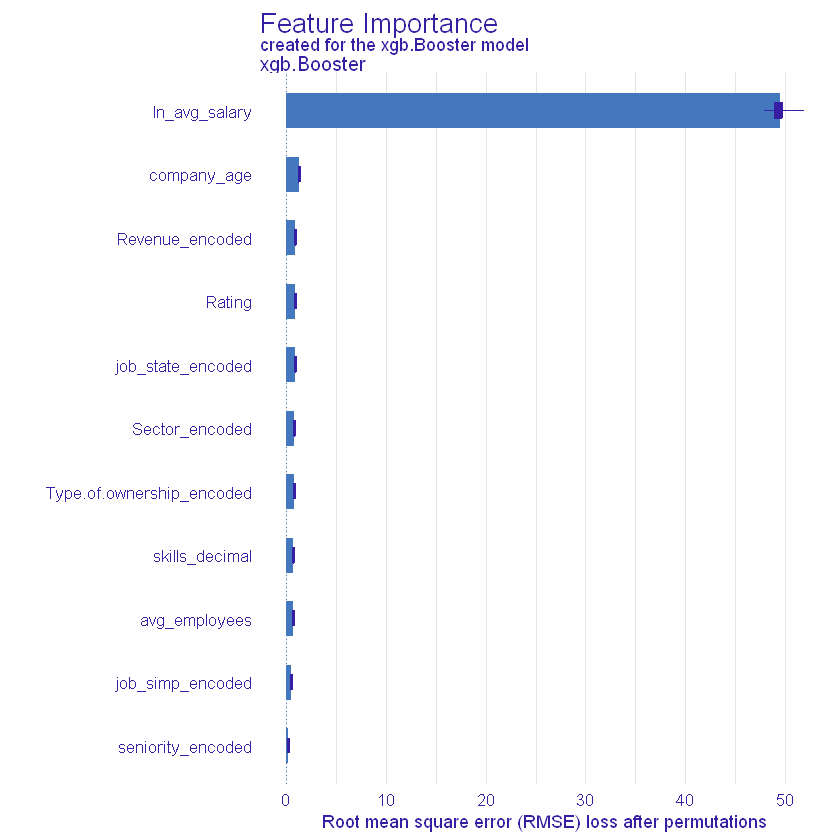

In [21]:
install.packages("DALEX")
library(DALEX)

# Compute SHAP values (this might take some time for large datasets or complex models)
shap_values <- predict(xgb_model, dtest, predcontrib = TRUE)

# Wrap your model in an explainer
explainer <- DALEX::explain(model = xgb_model, 
                            data = as.matrix(train_data[,-which(names(train_data) == "avg_salary")]), 
                            y = train_data$avg_salary)

# Use the variable_dropout() function to assess feature importance
vi <- model_parts(explainer, type = "difference")

# Plotting feature importance
plot(vi)
